In [2]:
# Importing the required libraries

from pathlib import Path

import numpy as np
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading the data

DATA_DIR = Path().cwd().parent / "data"
DATA_URL = DATA_DIR / "household_power_consumption.txt"

In [4]:
dtypes = {"Global_active_power": float, "Global_reactive_power": float,
          "Voltage": float, "Global_intensity": float, "Sub_metering_1": float, "Sub_metering_2": float, "Sub_metering_3": float}

df = pd.read_csv(DATA_URL, sep=';', na_values=['', '?'], dtype=dtypes)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

In [6]:
df["Time"] = pd.to_datetime(df["Time"], format='%H:%M:%S')

In [7]:
df.shape

(2075259, 9)

In [8]:
df = df[:15000]

In [9]:
df.shape

(15000, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   15000 non-null  datetime64[ns]
 1   Time                   15000 non-null  datetime64[ns]
 2   Global_active_power    14998 non-null  float64       
 3   Global_reactive_power  14998 non-null  float64       
 4   Voltage                14998 non-null  float64       
 5   Global_intensity       14998 non-null  float64       
 6   Sub_metering_1         14998 non-null  float64       
 7   Sub_metering_2         14998 non-null  float64       
 8   Sub_metering_3         14998 non-null  float64       
dtypes: datetime64[ns](2), float64(7)
memory usage: 1.0 MB


In [11]:
df.describe()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,15000,15000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,2006-12-21 10:18:37.440000,1900-01-01 12:04:52.560000,1.923701,0.124673,241.430458,8.122096,1.395453,2.041205,7.766902
min,2006-12-16 00:00:00,1900-01-01 00:00:00,0.194000,0.000000,228.910000,0.800000,0.000000,0.000000,0.000000
25%,2006-12-19 00:00:00,1900-01-01 05:54:00,0.564000,0.000000,238.760000,2.400000,0.000000,0.000000,0.000000
50%,2006-12-21 00:00:00,1900-01-01 12:09:00,1.721000,0.106000,241.710000,7.200000,0.000000,0.000000,0.000000
75%,2006-12-24 00:00:00,1900-01-01 18:19:00,2.796000,0.188000,244.210000,11.800000,0.000000,1.000000,17.000000
max,2006-12-27 00:00:00,1900-01-01 23:59:00,8.698000,0.800000,251.700000,37.000000,77.000000,73.000000,20.000000
std,NaN,NaN,1.415092,0.114861,3.735341,5.944161,7.073659,7.646986,8.705601


In [14]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

cols_with_missing_vals = ['Global_active_power', 'Global_reactive_power', 
                          'Voltage', 'Global_intensity', 'Sub_metering_1',
                          'Sub_metering_2', 'Sub_metering_3']

df.loc[:, cols_with_missing_vals] = imp_mean.fit_transform(df.loc[:, cols_with_missing_vals])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   15000 non-null  datetime64[ns]
 1   Time                   15000 non-null  datetime64[ns]
 2   Global_active_power    15000 non-null  float64       
 3   Global_reactive_power  15000 non-null  float64       
 4   Voltage                15000 non-null  float64       
 5   Global_intensity       15000 non-null  float64       
 6   Sub_metering_1         15000 non-null  float64       
 7   Sub_metering_2         15000 non-null  float64       
 8   Sub_metering_3         15000 non-null  float64       
dtypes: datetime64[ns](2), float64(7)
memory usage: 1.0 MB


In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
cols = ['Global_active_power', 'Global_reactive_power',
        'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
        'Sub_metering_3']

X = df[cols].values

In [20]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [22]:
from scipy.spatial.distance import cdist


def euclidean_distance(points) -> np.array:
    distances = np.empty(shape=(points.shape[0], points.shape[0]), dtype=np.float16)

    chunk_size = 500
    idx = 0

    for idx in tqdm(range(0, points.shape[0], chunk_size), desc="Calculating distance"):
        points_subset = points[idx : idx + chunk_size, :]
        
        distances[idx : idx + chunk_size, :] = cdist(points_subset, points)
        idx += chunk_size

    return distances

def create_neighbors(X: np.array, eps: float) -> pd.DataFrame:
    # X = df[["x", "y"]]
    distance_matrix = euclidean_distance(X)

    print(f"distance_matrix max = {distance_matrix.max()}, distance_matrix min = {distance_matrix.min()}")

    df = pd.DataFrame()
    for idx in tqdm(range(distance_matrix.shape[0]), desc="Creating neighbors"):
        neighbors_array = np.where(distance_matrix[idx, :] <= eps)[0]
        
        df.loc[idx, "neighbors"] = ",".join(
            list(map(str, neighbors_array))
        )

        df.loc[idx, "num_neighbors"] = neighbors_array.shape[0]

        df.loc[idx, "pt"] = idx

    df = df.astype({"num_neighbors": int, "pt": int})

    df["cluster"] = np.nan
    
    return df

df = create_neighbors(X_scaled, eps=0.15)

Calculating distance: 100%|█████████████████████| 30/30 [00:03<00:00,  8.22it/s]


distance_matrix max = 2.05859375, distance_matrix min = 0.0


Creating neighbors: 100%|████████████████| 15000/15000 [00:22<00:00, 664.49it/s]


In [23]:
class CustomDBSCAN:

    def __init__(self, eps: float, min_pts: int):
        self.eps = eps
        self.min_pts = min_pts

    
    def fit_predict(self, df: pd.DataFrame):        
        cluster_id = 0
        
        has_set_cluster = False
        num_points_without_cluster = df["cluster"].isna().sum()
        
        while num_points_without_cluster > 0:
            random_starting_point = df[df["cluster"].isna()].sample(n=1)

            queue = []
            queue.append(int(random_starting_point["pt"]))

            pts_visited = set()
            pts_visited.add(int(random_starting_point["pt"]))

            has_set_cluster = False

            while len(queue) > 0:
                point = queue.pop(0)

                # Setting the cluster id to this point
                if has_set_cluster or df[df["pt"] == point]["num_neighbors"].item() >= self.min_pts:
                    df.loc[df["pt"] == point, "cluster"] = cluster_id
            
                    # Adding all the neighbors to the queue
                    for neighbor in df[df["pt"] == point]["neighbors"].item().split(","):
                        if int(neighbor) not in pts_visited:
                            queue.append(int(neighbor))
                            pts_visited.add(int(neighbor))

                    has_set_cluster = True

                else:
                    df.loc[df["pt"] == point, "cluster"] = -1

            if has_set_cluster:
                cluster_id += 1

            num_points_without_cluster = df["cluster"].isna().sum()

        df["cluster"] = df["cluster"].astype(int)
        
        return df

In [33]:
dbscan = CustomDBSCAN(eps=0.15, min_pts=25)

In [34]:
result_df = dbscan.fit_predict(df.copy())

/tmp/ipykernel_15506/3812776189.py:18: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  queue.append(int(random_starting_point["pt"]))
/tmp/ipykernel_15506/3812776189.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pts_visited.add(int(random_starting_point["pt"]))


In [35]:
result_df.cluster.value_counts()

cluster
 0    8096
 1    6540
-1     254
 2     110
Name: count, dtype: int64

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(X_scaled)

pca = PCA(n_components=2)

pca_data = pca.fit_transform(standardized_data)

In [36]:
pca_df = pd.DataFrame(pca_data, columns=["component_1", "component_2"])
pca_df["cluster_label"] = result_df["cluster"]

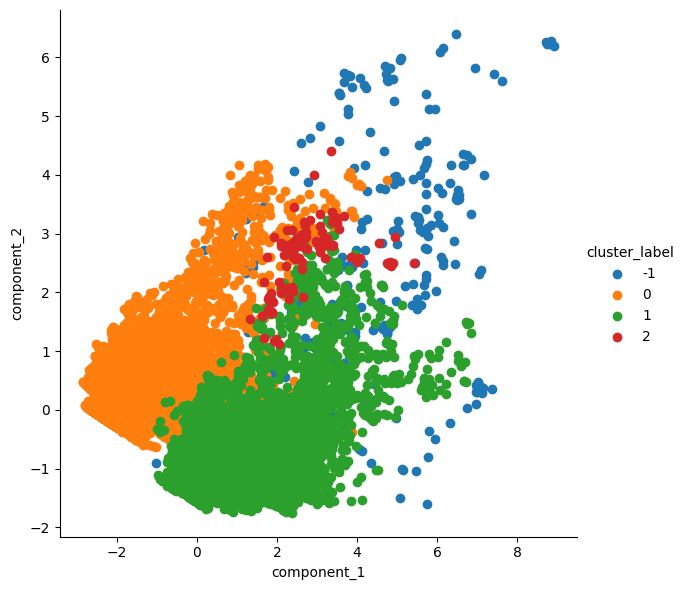

In [37]:
import seaborn as sn

sn.FacetGrid(pca_df, hue='cluster_label', height=6).map(plt.scatter, 'component_1', 'component_2').add_legend()
plt.show()